In [1]:
%run ../net_sym.py

In [2]:
import matplotlib.pyplot as plt

In [3]:
import scipy as sp

In [4]:
N = 5
g = get_strongly_connected_digraph(N)

In [5]:
node_list = np.arange(0,N)

In [6]:
A = nx.adjacency_matrix(g, nodelist = node_list)
D = np.diag(np.asarray(np.sum(A, axis=1)).reshape(-1))

In [21]:
a1 = 1
a2 = 2

In [22]:
L = a1*D - a2*A

In [23]:
v,e = np.linalg.eig(L)

In [24]:
v

array([-1.2843+0.j    ,  1.5   +1.9365j,  1.5   -1.9365j,  2.6421+0.8975j,
        2.6421-0.8975j])

In [11]:
np.abs(v[2]-3)

1.7320508075688759

In [12]:
D

array([[2, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 0, 1]])

In [13]:
np.asarray(e[4])

array([[ 0.4472+0.j    , -0.2236-0.3873j, -0.2236+0.3873j,
         0.4472+0.j    , -0.4472+0.j    ]])

In [14]:
init = 1 + np.random.rand(N)

In [15]:
f1 = lambda t,x: np.asarray(-a1*D.dot(x)+ A.dot(a2*x))
f2 = lambda t,x: np.asarray(-L.dot(x))[0]

In [16]:
res = sp.integrate.solve_ivp(fun=f1, t_span=[0,50], y0 = init)

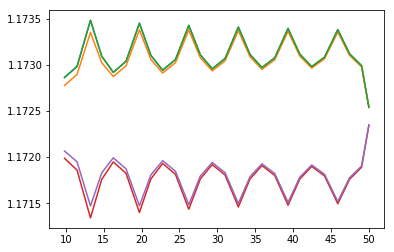

In [17]:
for i in range(0,N):
    plt.plot(res.t[10:], res.y[i,10:])

In [18]:
np.divide(res.y[:,-1], np.asarray(e[3]))

array([[ 2.6219+0.0000e+00j,  2.6219+1.2478e-15j,  2.6219-1.2478e-15j,
         2.6215+0.0000e+00j, -2.6215-0.0000e+00j]])

In [19]:
sp.linalg.null_space(L)

array([[-0.4472],
       [-0.4472],
       [-0.4472],
       [-0.4472],
       [-0.4472]])

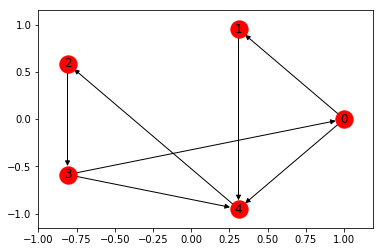

In [20]:
nx.draw_networkx(g, pos=nx.circular_layout(g))